<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_week6_Full_NLP_Processing_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/legacy-datasets/banking77/" + splits["train"])

print(df.head())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
from datasets import load_dataset

# Load banking77 from Hugging Face
dataset = load_dataset("banking77")

# Convert splits to pandas
df_train = dataset["train"].to_pandas()
df_test = dataset["test"].to_pandas()

# Display first few rows of train
print(df_train.head())


README.md:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/298k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/93.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10003 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3080 [00:00<?, ? examples/s]

                                                text  label
0                     I am still waiting on my card?     11
1  What can I do if my card still hasn't arrived ...     11
2  I have been waiting over a week. Is the card s...     11
3  Can I track my card while it is in the process...     11
4  How do I know if I will get my card, or if it ...     11


In [6]:
# Load the intent names
intent_labels = dataset["train"].features["label"].names

# Map label IDs to readable labels
df_train["intent"] = df_train["label"].map(lambda x: intent_labels[x])
df_train[["text", "intent"]].head()


,text,intent
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df_train["text"]
y = df_train["intent"]

vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42, stratify=y)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))



                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       1.00      0.94      0.97        32
                                activate_my_card       1.00      0.97      0.98        32
                                       age_limit       1.00      0.95      0.98        22
                         apple_pay_or_google_pay       1.00      0.96      0.98        25
                                     atm_support       0.94      0.88      0.91        17
                                automatic_top_up       1.00      0.88      0.94        25
         balance_not_updated_after_bank_transfer       0.87      0.76      0.81        34
balance_not_updated_after_cheque_or_cash_deposit       0.86      0.89      0.88        36
                         beneficiary_not_allowed       0.89      0.81      0.85        31
                                 cancel_transfer       0.85      0.94      0.89        31
         

In [8]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load embeddings model (SBERT via DistilBERT)
model = SentenceTransformer("all-MiniLM-L6-v2")

# Convert texts to sentence embeddings
X = model.encode(df_train["text"].tolist(), show_progress_bar=True)
y = df_train["intent"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict & evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.94      0.91      0.92        32
                                activate_my_card       0.97      1.00      0.98        32
                                       age_limit       1.00      0.95      0.98        22
                         apple_pay_or_google_pay       1.00      0.96      0.98        25
                                     atm_support       1.00      0.88      0.94        17
                                automatic_top_up       1.00      0.96      0.98        25
         balance_not_updated_after_bank_transfer       0.74      0.94      0.83        34
balance_not_updated_after_cheque_or_cash_deposit       0.92      0.92      0.92        36
                         beneficiary_not_allowed       0.89      0.81      0.85        31
                                 cancel_transfer       0.94      1.00      0.97        31
         

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


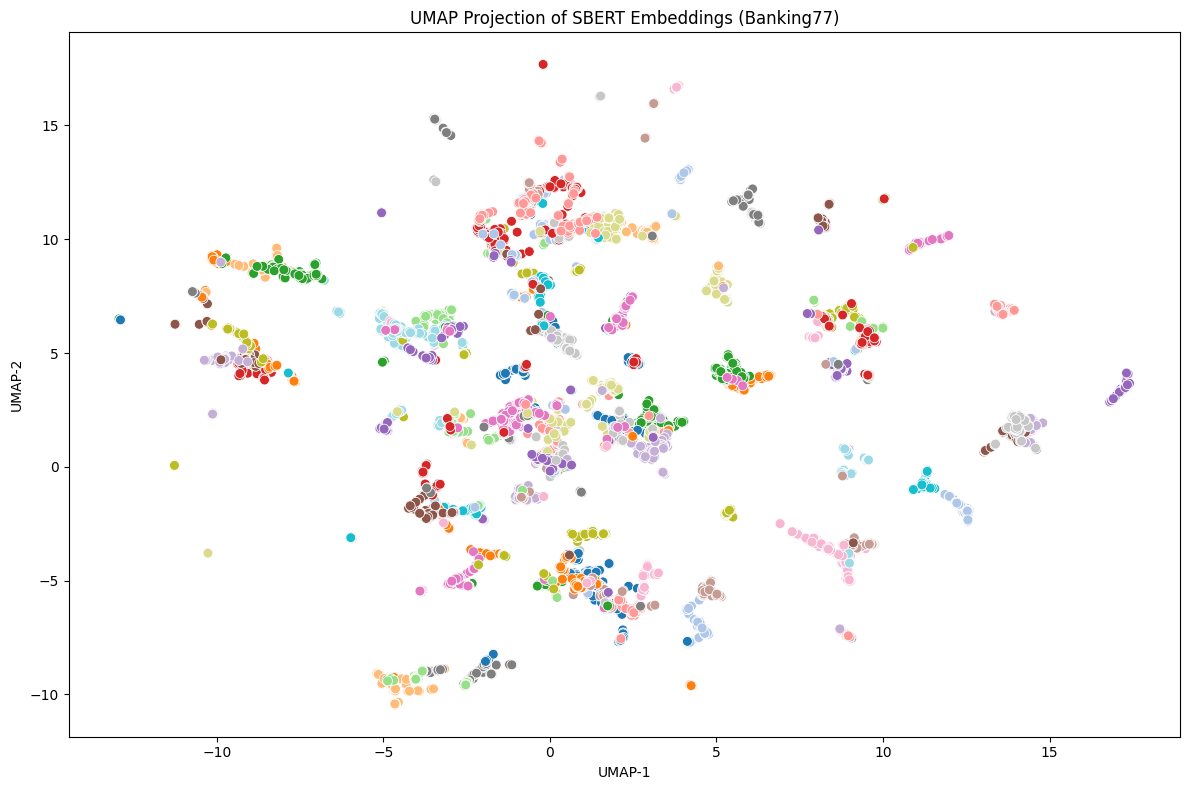

In [9]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for visualization
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric="cosine", random_state=42)
X_embedded = reducer.fit_transform(X)

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y, s=50, palette="tab20", legend=False)
plt.title("UMAP Projection of SBERT Embeddings (Banking77)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()


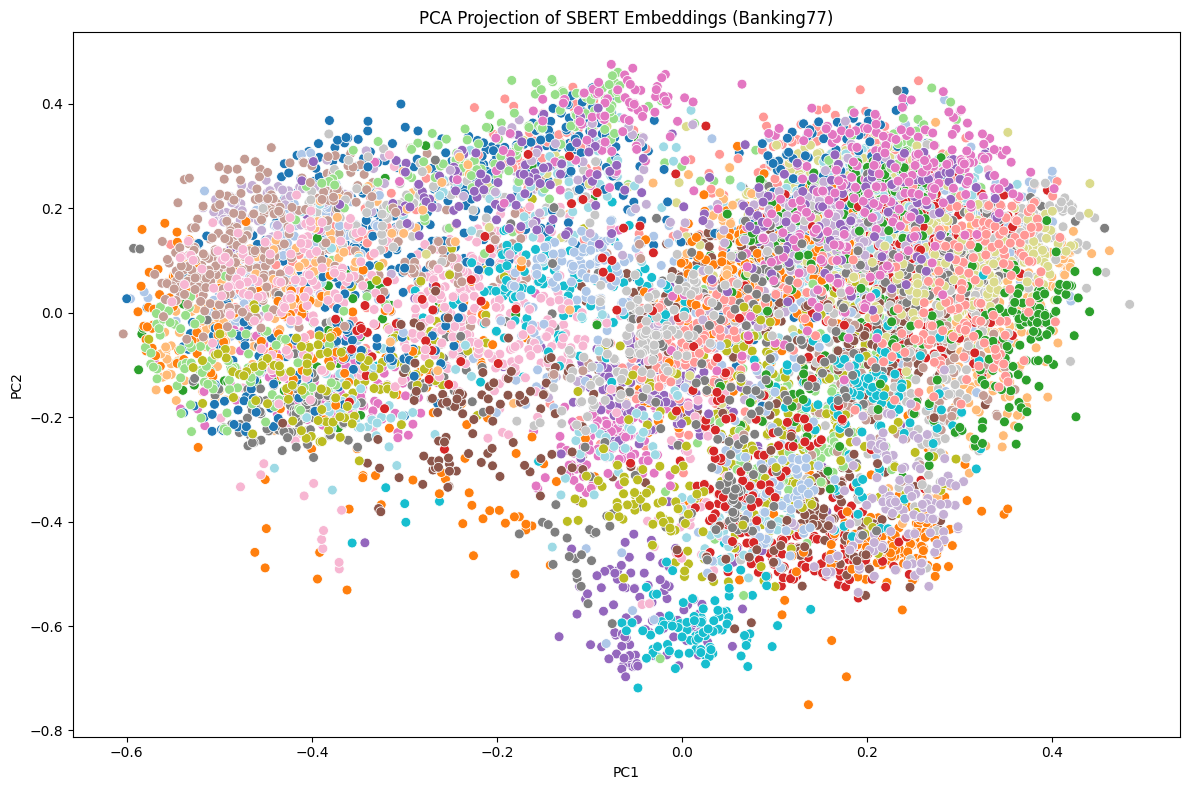

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, s=50, palette="tab20", legend=False)
plt.title("PCA Projection of SBERT Embeddings (Banking77)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()
